In [42]:
import os
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
import tensorflow as tf
from tensorflow.keras import models, layers

# Download latest version
path = kagglehub.dataset_download("gpiosenka/cards-image-datasetclassification")

print("Path to dataset files:", path)

os.listdir(path)

Path to dataset files: /root/.cache/kagglehub/datasets/gpiosenka/cards-image-datasetclassification/versions/2


['14card types-14-(200 X 200)-94.61.h5',
 'test',
 '53cards-53-(200 X 200)-100.00.h5',
 'train',
 'valid',
 'cards.csv']

In [43]:
train_dir =  os.path.join(path, "train")
test_dir =  os.path.join(path, "test")
val_dir =  os.path.join(path, "valid")
classes = os.listdir(train_dir)
print(len(classes))

53


<Figure size 640x480 with 0 Axes>

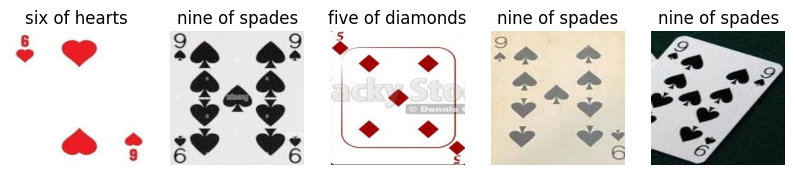

In [44]:
import random
def show_sample(dir,num_images=5):
  plt.figure(figsize=(10,10))
  for i in range(num_images):
    plt.subplot(1,num_images,i+1)
    class_name = random.choice(classes)
    class_dir = os.path.join(dir, class_name)
    image_name = random.choice(os.listdir(class_dir))
    image_path = os.path.join(class_dir, image_name)
    image = plt.imread(image_path)
    plt.imshow(image)
    plt.title(class_name)
    plt.axis('off')
plt.show()
plt.tight_layout()
show_sample(train_dir)

In [45]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
    horizontal_flip=True,
    height_shift_range=0.1,
    width_shift_range=0.1,
    brightness_range=(0.5,1.5),
    zoom_range = [1, 1.5])
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_gen  = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [46]:
train_data = train_gen.flow_from_directory(train_dir,target_size=(112,112),class_mode='categorical',batch_size=32,shuffle=True)
test_data = test_gen.flow_from_directory(test_dir,target_size=(112,112),class_mode='categorical',batch_size=32,shuffle=True)
val_data = val_gen.flow_from_directory(val_dir,target_size=(112,112),class_mode='categorical',batch_size=32,shuffle=True)

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.


Tranfer Learning

In [53]:
base_model = tf.keras.applications.VGG16(weights="imagenet", include_top=False, input_shape=(112, 112, 3))
for layer in base_model.layers[-5:]:
    layer.trainable = True
for layer in base_model.layers[:-5]:
    layer.trainable = False
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 112, 112, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 112, 112, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 112, 112, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 56, 56, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 28, 28, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 28, 28, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 7, 7, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 7, 7, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 7, 7, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [62]:
transfer_model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(len(classes), activation="softmax")
])

In [63]:
transfer_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss="categorical_crossentropy",
              metrics=['accuracy']
)

In [64]:
transfer_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 3, 3, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 53)                  │           6,837 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,311,989 (58.41 MB)

 Trainable params: 7,676,469 (29.28 MB)

 Non-trainable params: 7,635,520 (29.13 MB)

In [65]:
history =  transfer_model.fit(train_data, epochs=10, validation_data=val_data)

Epoch 1/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 50s 178ms/step - accuracy: 0.3749 - loss: 2.6297 - val_accuracy: 0.6075 - val_loss: 1.5339
Epoch 2/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 39s 159ms/step - accuracy: 0.6470 - loss: 1.3952 - val_accuracy: 0.6943 - val_loss: 1.1682
Epoch 3/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 41s 158ms/step - accuracy: 0.7122 - loss: 1.1045 - val_accuracy: 0.7811 - val_loss: 0.9995
Epoch 4/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 39s 155ms/step - accuracy: 0.7719 - loss: 0.8679 - val_accuracy: 0.7736 - val_loss: 0.9015
Epoch 5/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 38s 154ms/step - accuracy: 0.8064 - loss: 0.7334 - val_accuracy: 0.7698 - val_loss: 0.8816
Epoch 6/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 41s 158ms/step - accuracy: 0.8503 - loss: 0.5931 - val_accuracy: 0.8000 - val_loss: 0.8359
Epoch 7/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 38s 155ms/step - accuracy: 0.8769 - loss: 0.4891 - val_accuracy: 0.7811 - val_loss: 0.8115
Epoch 8/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 42s 159ms/step - accuracy: 0.9020 - loss: 0

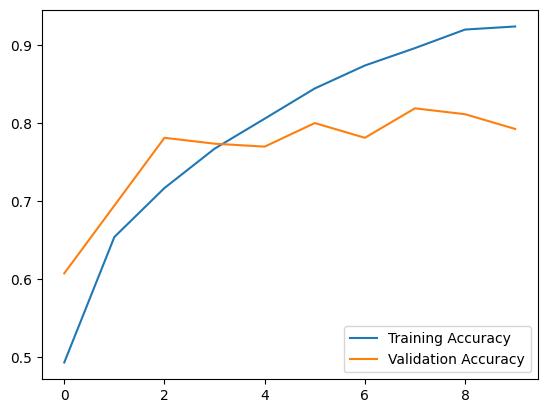

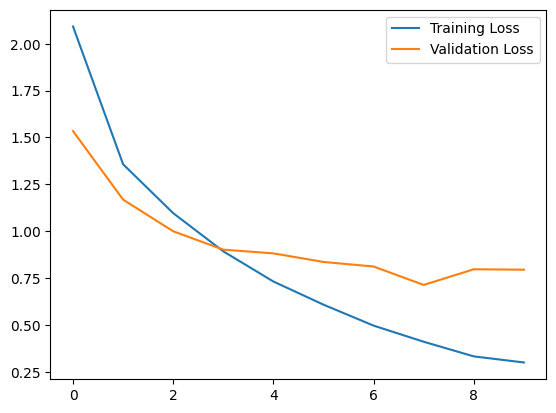

In [68]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.show()

In [70]:
transfer_model.evaluate(test_data)

2/9 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.8438 - loss: 0.6670 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8057 - loss: 0.8018


[0.8827996253967285, 0.7924528121948242]